# Example 1

This notebook computes event rates and event spectra for a few benchmark models

In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import DarkNews as dn
from DarkNews import const

In [43]:
cmd_string = f"dn_gen --exp=miniboone_fhc --umu5={np.sqrt(1.5e-6):.2g} --umu4={np.sqrt(2.6e-6):.2g} --ud5={np.sqrt(4/11):.2g} --ud4={np.sqrt(7/11):.2g} --chi={np.sqrt(1e-5)} --gD=2 --ud4=0.5 --mzprime=1.25 --m4=0.080 --m5=0.140 --neval=10000 --nint=30 --D_or_M=majorana --log=INFO"
const.subprocess_cmd(cmd_string)

cmd_string = f"dn_gen --exp=miniboone_fhc --umu5={np.sqrt(1.5e-6):.2g} --umu4={np.sqrt(2.6e-6):.2g} --ud5={np.sqrt(4/11):.2g} --ud4={np.sqrt(7/11):.2g} --chi={np.sqrt(1e-5)} --gD=2 --ud4=0.5 --mzprime=1.25 --m4=0.080 --m5=0.140 --neval=10000 --nint=30 --D_or_M=dirac --log=INFO"
const.subprocess_cmd(cmd_string)


# cmd_string = f"dn_gen --exp=miniboone_fhc --umu4={np.sqrt(1e-6):.2g} --ud4={np.sqrt(7/11):.2g} --chi={np.sqrt(5e-6)} --gD=1 --mzprime=1.25 --m4=0.140 --neval=1000 --D_or_M=majorana --log=INFO"
# const.subprocess_cmd(cmd_string)


# cmd_string = f"dn_gen --log=DEBUG --exp=miniboone_fhc --umu4={np.sqrt(9e-7):.2g} --ud4={1} --alpha_epsilon2={2e-10} --alphaD=0.25 --mzprime=0.03 --m4=0.420 --neval=10000 --nint=20 --D_or_M=majorana --log=INFO"
# const.subprocess_cmd(cmd_string)


# cmd_string = f"dn_gen --log=DEBUG --exp=miniboone_fhc --umu4={np.sqrt(9e-7):.2g} --ud4={1} --alpha_epsilon2={2e-10} --alphaD=0.25 --mzprime=0.03 --m4=0.420 --neval=10000 --nint=20 --D_or_M=dirac --log=INFO"
# const.subprocess_cmd(cmd_string)


dn_gen --exp=miniboone_fhc --umu5=0.0012 --umu4=0.0016 --ud5=0.6 --ud4=0.8 --chi=0.0031622776601683794 --gD=2 --ud4=0.5 --mzprime=1.25 --m4=0.080 --m5=0.140 --neval=10000 --nint=30 --D_or_M=majorana --log=INFO


    #########################################################
    #   ______           _        _   _                     #
    #   |  _  \         | |      | \ | |                    #
    #   | | | |__ _ _ __| | __   |  \| | _____      _____   #
    #   | | | / _  | ___| |/ /   | .   |/ _ \ \ /\ / / __|  #
    #   | |/ / (_| | |  |   <    | |\  |  __/\ V  V /\__ \  #
    #   |___/ \__,_|_|  |_|\_\   \_| \_/\___| \_/\_/ |___/  #
    #                                                       #
    #########################################################
    
Theory model used: 3+2 majorana HNL model


Generating helicity conserving upscattering events for:
	nu(mu) + C12 -> N5 +  C12 -> N4 + e+ + e- + C12

decaying N5 using off-shell mediator.
Generating helicity flipping upscatte

In [44]:
df_d = pd.read_pickle('data/miniboone_fhc/3plus2/m5_0.14_m4_0.08_mzprime_1.25_dirac/pandas_df.pckl')
df_m = pd.read_pickle('data/miniboone_fhc/3plus2/m5_0.14_m4_0.08_mzprime_1.25_majorana/pandas_df.pckl')

# df_m = pd.read_pickle('data/miniboone_fhc/3plus1/m4_0.14_mzprime_1.25_majorana/pandas_df.pckl')

# df_d = pd.read_pickle('data/miniboone_fhc/3plus1/m4_0.42_mzprime_0.03_dirac/pandas_df.pckl')
# df_m = pd.read_pickle('data/miniboone_fhc/3plus1/m4_0.42_mzprime_0.03_majorana/pandas_df.pckl')

In [45]:
np.sum(df_d['w_event_rate'])/np.sum(df_m['w_event_rate'])

0.9435274587328154

In [46]:
np.sum(df_d['w_decay_rate_0'])/np.sum(df_m['w_decay_rate_0'])

0.6237122717877723

In [47]:
# np.sum(df_d['w_decay_rate_1'])/np.sum(df_m['w_decay_rate_1'])

In [48]:
const.get_decay_rate_in_cm(np.sum(df_d['w_decay_rate_0']))

11.875738371572151

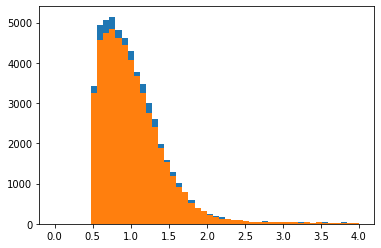

In [49]:
import matplotlib.pyplot as plt

_=plt.hist(df_m['P_projectile','0'], range=(0,4), bins=50, weights=df_m['w_event_rate'])
_=plt.hist(df_d['P_projectile','0'], range=(0,4), bins=50, weights=df_d['w_event_rate'])


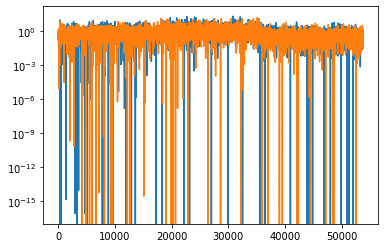

In [50]:
plt.plot(df_d['w_flux_avg_xsec'])
plt.plot(df_m['w_flux_avg_xsec'])
plt.yscale("log")

In [51]:
df_m

P_projectile                     P_decay_N_parent                      \
                 0    1    2         3                0         1         2   
0         0.524485  0.0  0.0  0.524485         0.524194  0.076699  0.000004   
1         0.634455  0.0  0.0  0.634455         0.634350  0.030537  0.033155   
2         0.576981  0.0  0.0  0.576981         0.576822  0.001970 -0.055919   
3         0.513850  0.0  0.0  0.513850         0.513455 -0.086725  0.023053   
4         0.665620  0.0  0.0  0.665620         0.665277 -0.083267 -0.017390   
...            ...  ...  ...       ...              ...       ...       ...   
53731     1.599564  0.0  0.0  1.599564         1.387932  0.569979  0.012446   
53732     1.278678  0.0  0.0  1.278678         0.921451 -0.509742  0.380754   
53733     1.246878  0.0  0.0  1.246878         0.805105 -0.540535  0.346938   
53734     2.400028  0.0  0.0  2.400028         1.007325  0.551933  0.692820   
53735     1.553326  0.0  0.0  1.553326         1.170645 -0.410635  0.557998   

                  P_target       ... decay_displacement      w_decay_rate_0  \
              3          0    1  ...                  2    3                  
0      0.499296  11.174864 -0.0  ...                0.0  0.0   1.532347e-21   
1      0.617065  11.174864 -0.0  ...                0.0  0.0   2.985884e-21   
2      0.556770  11.174864 -0.0  ...               -0.0  0.0   3.800178e-21   
3      0.485781  11.174864 -0.0  ...                0.0  0.0   1.516358e-21   
4      0.644793  11.174864 -0.0  ...               -0.0  0.0   1.535460e-21   
...         ...        ...  ...  ...                ...  ...            ...   
53731  1.257666   0.938272 -0.0  ...                0.0  0.0   5.403348e-21   
53732  0.651660   0.938272 -0.0  ...                0.0  0.0   3.275382e-21   
53733  0.464813   0.938272 -0.0  ...                0.0  0.0   3.690057e-21   
53734  0.458776   0.938272 -0.0  ...                0.0  0.0   1.932727e-19   
53735  0.933181   0.938272 -0.0  ...                0.0  0.0   6.715953e-21   

      w_event_rate w_flux_avg_xsec        target target_pdgid  \
                                                                
0         0.428494        0.525100           C12   1000060120   
1         0.413800        0.680536           C12   1000060120   
2         0.719235        0.677783           C12   1000060120   
3         0.498530        0.326561           C12   1000060120   
4         0.532328        0.456079           C12   1000060120   
...            ...             ...           ...          ...   
53731     0.353284        0.235418  proton_in_H1         2212   
53732     0.290132        0.188987  proton_in_H1         2212   
53733     0.253725        0.170366  proton_in_H1         2212   
53734     0.033780        0.023043  proton_in_H1         2212   
53735     0.282027        0.165881  proton_in_H1         2212   

      scattering_regime    helicity  \
                                      
0              coherent  conserving   
1              coherent  conserving   
2              coherent  conserving   
3              coherent  conserving   
4              coherent  conserving   
...                 ...         ...   
53731              p-el    flipping   
53732              p-el    flipping   
53733              p-el    flipping   
53734              p-el    flipping   
53735              p-el    flipping   

                                      underlying_process  
                                                          
0        nu(mu) + C12 -> N5 +  C12 -> N4 + e+ + e- + C12  
1        nu(mu) + C12 -> N5 +  C12 -> N4 + e+ + e- + C12  
2        nu(mu) + C12 -> N5 +  C12 -> N4 + e+ + e- + C12  
3        nu(mu) + C12 -> N5 +  C12 -> N4 + e+ + e- + C12  
4        nu(mu) + C12 -> N5 +  C12 -> N4 + e+ + e- + C12  
...                                                  ...  
53731  nu(mu) + proton_in_H1 -> N5 +  proton_in_H1 ->...  
53732  nu(mu) + proton_in_H1 -> N5 +  proton_in_H1 ->...  
53733 

In [52]:
len(df_m['w_flux_avg_xsec'][df_m['w_flux_avg_xsec'] == 0])

31